In [1]:
from pygam import LinearGAM,LogisticGAM,l,s,f, GAM
from pygam.datasets import wage
import matplotlib.pyplot as plt
import numpy as np

In [6]:
feature_names = ['year','age','education']
X,y = wage(return_X_y=True)
y

array([ 75.04315402,  70.47601965, 130.98217738, ...,  66.22940829,
        87.98103279,  90.48191336])

In [7]:

np.savetxt('X_wage.csv', X, delimiter=',')
np.savetxt('y_wage.csv', y, delimiter=',')


In [8]:
# Linear Distribution static lambda
# Modificación de parámetros
n_splines = 25
lam = 0.6
constraints = None
linear_gam = GAM(s(0)+s(1)+f(2), n_splines = n_splines, lam = lam, constraints = constraints, distribution='normal', link='identity')
linear_gam.fit(X,y)

linear_gam.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     28.7369
Link Function:                     IdentityLink Log Likelihood:                                -24121.1165
Number of Samples:                         3000 AIC:                                            48301.7068
                                                AICc:                                           48302.3225
                                                GCV:                                             1259.4255
                                                Scale:                                            1237.729
                                                Pseudo R-Squared:                                   0.2958
Feature Function                  Lam

/home/vacek/anaconda3/envs/mds/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  if __name__ == '__main__':


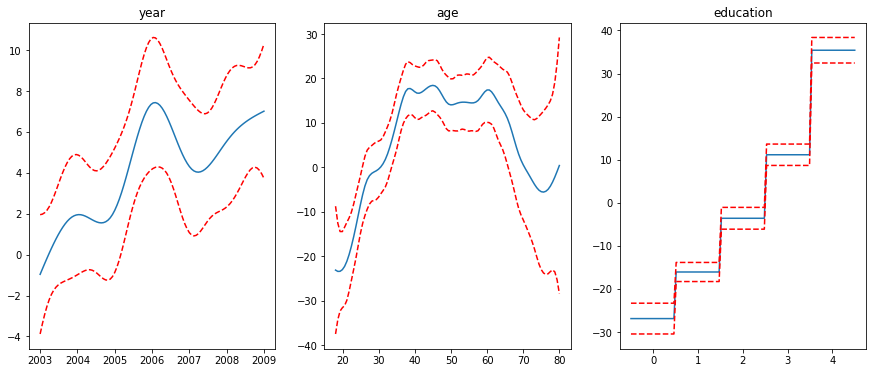

In [9]:
fig, axes = plt.subplots(1, 3,figsize=(15,6))
titles = feature_names

for i, ax in enumerate(axes):
    XX = linear_gam.generate_X_grid(term=i)
    pdep, confi = linear_gam.partial_dependence(term=i, width=.95)

    plt.subplot(axes[i])
    plt.plot(XX[:, i], pdep)
    plt.plot(XX[:, i], confi, c='r', ls='--')
    plt.title(titles[i])

In [10]:
# Linear Distribution search lambda
# Modificación de parámetros
n_splines = 25
constraints = None
linear_gam = LinearGAM(s(0)+s(1)+f(2), n_splines = n_splines, constraints = constraints)

lams = np.random.rand(1000, X.shape[1])
lams = lams * 8 - 3
lams = np.exp(lams)

gam_kwargs = {"lam": lams, "progress": True}

linear_gam.gridsearch(X,y, **gam_kwargs)

linear_gam.summary()

100% (1000 of 1000) |####################| Elapsed Time: 0:02:44 Time:  0:02:44


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     17.3945
Link Function:                     IdentityLink Log Likelihood:                                -24115.5347
Number of Samples:                         3000 AIC:                                            48267.8584
                                                AICc:                                           48268.0978
                                                GCV:                                             1248.4482
                                                Scale:                                           1235.4253
                                                Pseudo R-Squared:                                   0.2944
Feature Function                  Lam

/home/vacek/anaconda3/envs/mds/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  from ipykernel import kernelapp as app


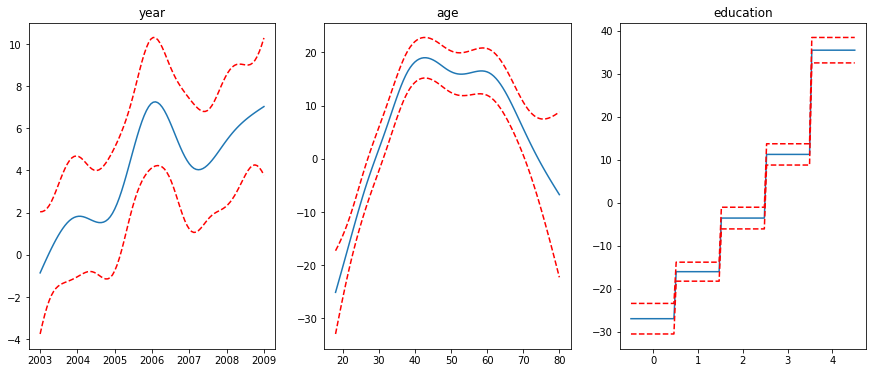

In [8]:
fig, axes = plt.subplots(1, 3,figsize=(15,6))
titles = feature_names

for i, ax in enumerate(axes):
    XX = linear_gam.generate_X_grid(term=i)
    pdep, confi = linear_gam.partial_dependence(term=i, width=.95)

    plt.subplot(axes[i])
    plt.plot(XX[:, i], pdep)
    plt.plot(XX[:, i], confi, c='r', ls='--')
    plt.title(titles[i])

In [9]:
# Logistic Distribution
# create a new feature for classification
y_cls = (y>250).astype(int)
logit_gam = LogisticGAM(s(0)+s(1)+f(2))
logit_gam.fit(X,y_cls)

logit_gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     16.6923
Link Function:                        LogitLink Log Likelihood:                                  -300.6444
Number of Samples:                         3000 AIC:                                              634.6735
                                                AICc:                                             634.8953
                                                UBRE:                                                2.216
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1769
Feature Function                  Lam

/home/vacek/anaconda3/envs/repsol_coker/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  import sys


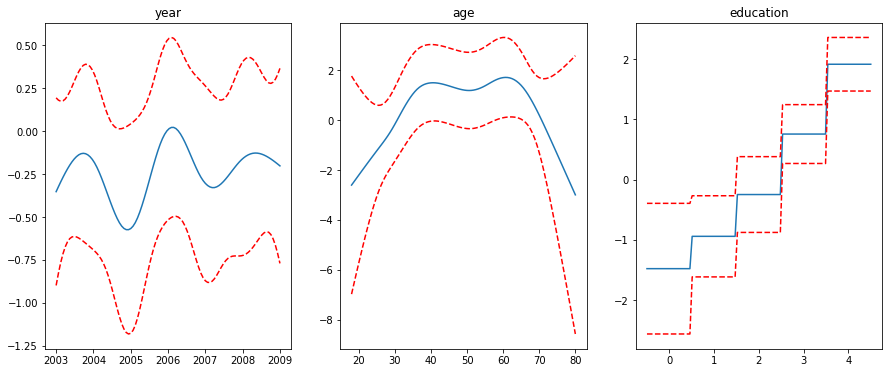

In [10]:
fig, axes = plt.subplots(1, 3,figsize=(15,6))
titles = feature_names

for i, ax in enumerate(axes):
    XX = logit_gam.generate_X_grid(term=i)
    pdep, confi = logit_gam.partial_dependence(term=i, width=.95)

    plt.subplot(axes[i])
    plt.plot(XX[:, i], pdep)
    plt.plot(XX[:, i], confi, c='r', ls='--')
    plt.title(titles[i])

In [11]:
# Logistic Distribution
# create a new feature for classification
y_cls = (y>250).astype(int)
logit_gam = LogisticGAM(s(0)+s(1)+f(2))
logit_gam.gridsearch(X,y_cls, **gam_kwargs)

logit_gam.summary()

100% (1000 of 1000) |####################| Elapsed Time: 0:00:43 Time:  0:00:43


LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      10.645
Link Function:                        LogitLink Log Likelihood:                                  -302.9663
Number of Samples:                         3000 AIC:                                              627.2227
                                                AICc:                                             627.3213
                                                UBRE:                                               2.2119
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1706
Feature Function                  Lam

/home/vacek/anaconda3/envs/repsol_coker/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  import sys


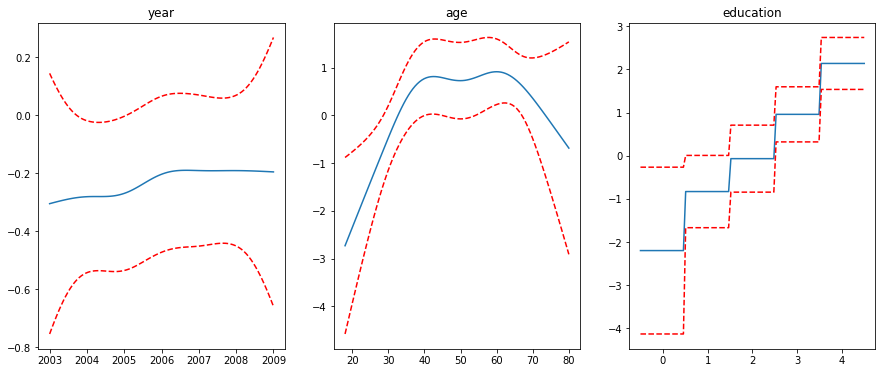

In [18]:
fig, axes = plt.subplots(1, 3,figsize=(15,6))
titles = feature_names

for i, ax in enumerate(axes):
    XX = logit_gam.generate_X_grid(term=i)
    pdep, confi = logit_gam.partial_dependence(term=i, width=.95)

    plt.subplot(axes[i])
    plt.plot(XX[:, i], pdep)
    plt.plot(XX[:, i], confi, c='r', ls='--')
    plt.title(titles[i])